# Keep-it-dry! Model: RidgeClassifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

## Read Data

Dataset selections (based on KNN Performance for time efficiency):
1. kid_train_ii_mm_smotenc_1.csv
2. kid_train_ii_mm_smote_1.csv
3. kid_train_ki_mm_smotenc_1.csv
4. kid_train_ki_mm_smote.csv

In [2]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

## Dataset Selection

In [3]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.75, stratify=y_df, random_state=42)
    
    lgbm_clf_dataset = LGBMClassifier(random_state=42)
    lgbm_clf_dataset.fit(X_train, y_train)

    y_predict = lgbm_clf_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(lgbm_clf_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(lgbm_clf_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

[LightGBM] [Info] Number of positive: 5114, number of negative: 5230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4862
[LightGBM] [Info] Number of data points in the train set: 10344, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494393 -> initscore=-0.022429
[LightGBM] [Info] Start training from score -0.022429
[LightGBM] [Info] Number of positive: 5230, number of negative: 5230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4174
[LightGBM] [Info] Number of data points in the train set: 10460, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightG

In [4]:
df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

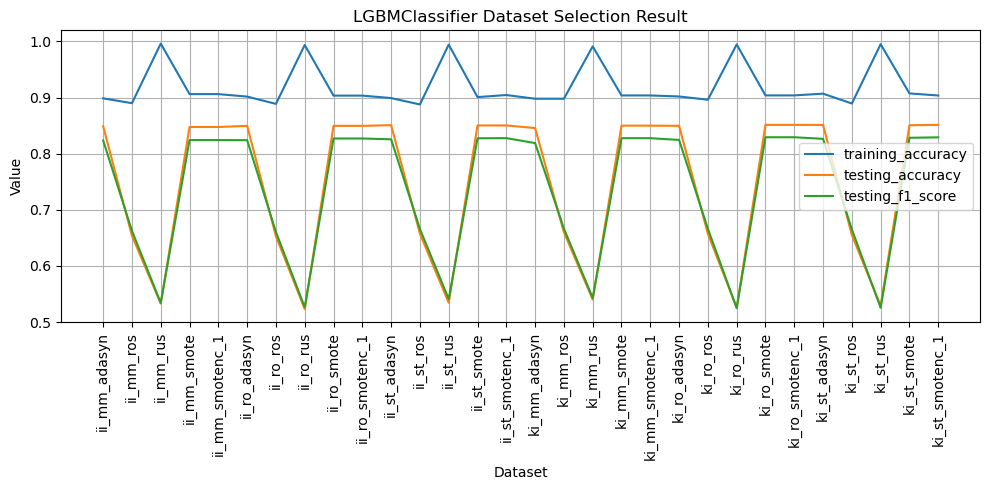

In [5]:
plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("LGBMClassifier Dataset Selection Result")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

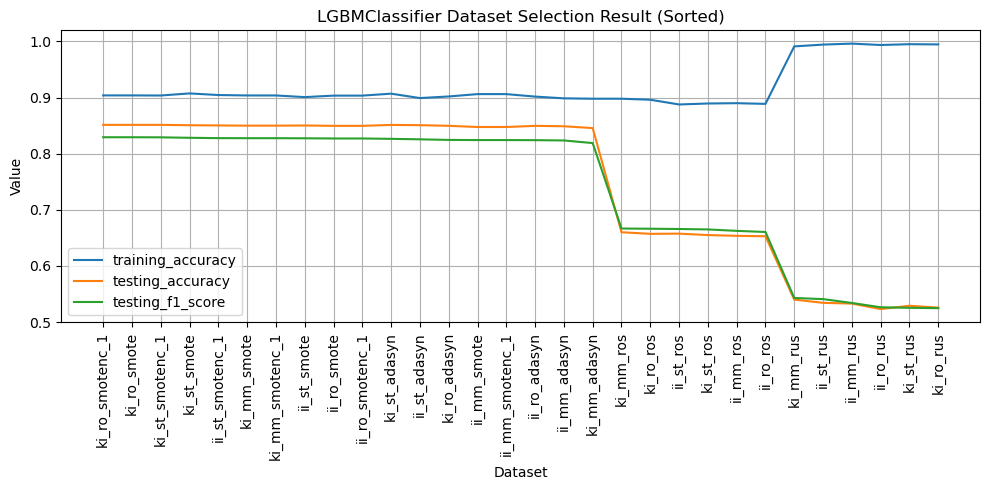

In [6]:
plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("LGBMClassifier Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

In [8]:
df_result_sorted.head(15)

dataset  training_accuracy  testing_accuracy  testing_f1_score
24  ki_ro_smotenc_1           0.903824          0.851316          0.829284
23      ki_ro_smote           0.903824          0.851316          0.829284
29  ki_st_smotenc_1           0.903633          0.851348          0.829115
28      ki_st_smote           0.907361          0.850679          0.828289
14  ii_st_smotenc_1           0.904493          0.850296          0.827685
18      ki_mm_smote           0.903728          0.849914          0.827586
19  ki_mm_smotenc_1           0.903728          0.849914          0.827586
13      ii_st_smote           0.900765          0.850233          0.827422
8       ii_ro_smote           0.903442          0.849563          0.827063
9   ii_ro_smotenc_1           0.903442          0.849563          0.827063
25     ki_st_adasyn           0.906907          0.851206          0.826428
10     ii_st_adasyn           0.899060          0.850791          0.825577
20     ki_ro_adasyn           0.901928          0.849603          0.824501
3       ii_mm_smote           0.906119          0.847524          0.824242
4   ii_mm_smotenc_1           0.906119          0.847524          0.824242

### Dataset selection result

Based on F1-Score
1. ki_st_smotenc_1
2. ii_st_smotenc_1
3. ki_st_adasyn
4. ii_st_adasyn
5. ki_mm_ros
6. ki_ro_ros

## Training

In [9]:
training_datasets = {}
training_datasets['ki_st_smotenc_1'] = datasets_dict['ki_st_smotenc_1']
training_datasets['ii_st_smotenc_1'] = datasets_dict['ii_st_smotenc_1']
training_datasets['ki_st_adasyn'] = datasets_dict['ki_st_adasyn']
training_datasets['ii_st_adasyn'] = datasets_dict['ii_st_adasyn']
training_datasets['ki_ro_ros'] = datasets_dict['ki_ro_ros']
training_datasets['ki_mm_ros'] = datasets_dict['ki_mm_ros']

In [10]:
lgbm_grid = {}
lgbm_grid['title'] = []
lgbm_grid['f1_score'] = []
lgbm_grid['parameters'] = []
best_model = {}

# Define hyperparameter grid for LightGBM tuning
param_grid = {
    'learning_rate': [.001, .01, .1, .3, .5],
    'max_depth': [3, 5, 8],
    'n_estimators': [50, 100, 200]
}

# Loop through each selected dataset
for title, data in training_datasets.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    # Create LightGBM classifier and GridSearchCV object
    lgbm_clf = LGBMClassifier(random_state=42)  # Use LGBMClassifier
    grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=8, scoring='f1_macro')  # Adjust cv and scoring if needed

    # Fit the GridSearchCV object to the current dataset
    grid_search.fit(X_df, y_df)

    # Print results (best parameters and best score)
    print(f"Dataset: {title}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best F1 Score: {grid_search.best_score_}")

    lgbm_grid['title'].append(title)
    lgbm_grid['parameters'].append(grid_search.best_params_)
    lgbm_grid['f1_score'].append(grid_search.best_score_)

    # Access the best model for further use (optional)
    best_model[title] = grid_search.best_estimator_

[LightGBM] [Info] Number of positive: 18306, number of negative: 18305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4875
[LightGBM] [Info] Number of data points in the train set: 36611, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500014 -> initscore=0.000055
[LightGBM] [Info] Start training from score 0.000055
[LightGBM] [Info] Number of positive: 18305, number of negative: 18306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4875
[LightGBM] [Info] Number of data points in the train set: 36611, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499986 -> initscore=-0.000055
[LightGBM] [Info] Start training from score -0.000055
[LightGBM] [In

In [11]:
from pprint import pprint
pprint(lgbm_grid)

{'f1_score': [0.7552718650980754,
              0.7545535043802752,
              0.7582545709847889,
              0.7576471487394767,
              0.7692077754334555,
              0.7678762726569852],
 'parameters': [{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200},
                {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100},
                {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100},
                {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100},
                {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 200},
                {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 200}],
 'title': ['ki_st_smotenc_1',
           'ii_st_smotenc_1',
           'ki_st_adasyn',
           'ii_st_adasyn',
           'ki_ro_ros',
           'ki_mm_ros']}


With the above conditions, we'll prioritize good F1-Score: ki_ro_ros. But we'll export them all.

1. ki_st_smotenc_1 (test: kid_test_ki_st.csv)
2. ii_st_smotenc_1 (test: kid_test_ii_st.csv)
3. ki_st_adasyn (test: kid_test_ki_st.csv)
4. ii_st_adasyn (test: kid_test_ii_st.csv)
5. ki_ro_ros (test: kid_test_ki_ro.csv)
6. ki_mm_ros (test: kid_test_ki_mm.csv)

## Prediction

In [14]:
df_ki_st_smotenc_test = pd.read_csv('./../Preprocessing/kid_test_ki_st.csv', index_col=0)
df_ii_st_smotenc_test = pd.read_csv('./../Preprocessing/kid_test_ii_st.csv', index_col=0)
df_ki_st_adasyn_test = pd.read_csv('./../Preprocessing/kid_test_ki_st.csv', index_col=0)
df_ii_st_adasyn_test = pd.read_csv('./../Preprocessing/kid_test_ii_st.csv', index_col=0)
df_ki_ro_ros_test = pd.read_csv('./../Preprocessing/kid_test_ki_ro.csv', index_col=0)
df_ki_mm_ros_test = pd.read_csv('./../Preprocessing/kid_test_ki_mm.csv', index_col=0)

In [13]:
id = df_ki_st_smotenc_test[['id']].copy()

In [15]:
to_drop = df_ki_st_smotenc_test.select_dtypes(include=['object']).columns

X_ki_st_smotenc_test = df_ki_st_smotenc_test.copy().drop(to_drop, axis=1)
X_ii_st_smotenc_test = df_ii_st_smotenc_test.copy().drop(to_drop, axis=1)
X_ki_st_adasyn_test = df_ki_st_adasyn_test.copy().drop(to_drop, axis=1)
X_ii_st_adasyn_test = df_ii_st_adasyn_test.copy().drop(to_drop, axis=1)
X_ki_ro_ros_test = df_ki_ro_ros_test.copy().drop(to_drop, axis=1)
X_ki_mm_ros_test = df_ki_mm_ros_test.copy().drop(to_drop, axis=1)

X_ki_st_smotenc_test.head()

id   loading  attribute_0  attribute_1  attribute_2  attribute_3  \
0  26570 -0.212329          5.0          6.0            6            4   
1  26571 -0.368168          5.0          6.0            6            4   
2  26572 -0.402885          5.0          6.0            6            4   
3  26573 -0.388484          5.0          6.0            6            4   
4  26574  2.061738          5.0          6.0            6            4   

   measurement_0  measurement_1  measurement_2  measurement_3  ...  \
0      -0.343944       0.182763      -0.077535       1.521426  ...   
1       0.870647      -0.055370      -1.890746       0.092691  ...   
2       0.141893       0.897164      -0.681939       0.687495  ...   
3       0.141893       0.659031       1.131272      -1.278774  ...   
4       1.599402       1.849699       0.526868       0.017336  ...   

   measurement_12  measurement_13  measurement_14  measurement_15  \
0        1.424997       -1.765342        0.541059       -0.836357   
1        0.531332        1.617192        0.460550       -0.149489   
2       -0.546019       -2.028201       -0.207602        1.371054   
3       -0.528132       -0.129577       -0.255770       -1.581683   
4        0.165336        0.375716        0.099294       -1.114028   

   measurement_16  measurement_17  product_code_F  product_code_G  \
0        0.753615       -0.560440             1.0             0.0   
1       -1.427508       -1.378483             1.0             0.0   
2       -0.267426       -0.356019             1.0             0.0   
3       -0.213019       -0.898397             1.0             0.0   
4        0.415082        0.834882             1.0             0.0   

   product_code_H  product_code_I  
0             0.0             0.0  
1             0.0             0.0  
2             0.0             0.0  
3             0.0             0.0  
4             0.0             0.0  

[5 rows x 28 columns]

In [16]:
# Drop one-hot label and ID
to_drop_again = ['id', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I']
X_ki_st_smotenc_test.drop(to_drop_again, axis=1, inplace=True)
X_ii_st_smotenc_test.drop(to_drop_again, axis=1, inplace=True)
X_ki_st_adasyn_test.drop(to_drop_again, axis=1, inplace=True)
X_ii_st_adasyn_test.drop(to_drop_again, axis=1, inplace=True)
X_ki_ro_ros_test.drop(to_drop_again, axis=1, inplace=True)
X_ki_mm_ros_test.drop(to_drop_again, axis=1, inplace=True)

In [17]:
X_ki_st_smotenc_test.head()

loading  attribute_0  attribute_1  attribute_2  attribute_3  \
0 -0.212329          5.0          6.0            6            4   
1 -0.368168          5.0          6.0            6            4   
2 -0.402885          5.0          6.0            6            4   
3 -0.388484          5.0          6.0            6            4   
4  2.061738          5.0          6.0            6            4   

   measurement_0  measurement_1  measurement_2  measurement_3  measurement_4  \
0      -0.343944       0.182763      -0.077535       1.521426      -1.573997   
1       0.870647      -0.055370      -1.890746       0.092691       0.196684   
2       0.141893       0.897164      -0.681939       0.687495      -1.267241   
3       0.141893       0.659031       1.131272      -1.278774      -0.855196   
4       1.599402       1.849699       0.526868       0.017336       0.972180   

   ...  measurement_8  measurement_9  measurement_10  measurement_11  \
0  ...      -0.371928      -0.638385       -0.154240       -0.740149   
1  ...       0.347647       0.614758       -1.538147       -0.558721   
2  ...      -1.258799       0.320321        0.669152       -0.729397   
3  ...      -0.075633       0.368205        1.479509       -2.021566   
4  ...       0.118874       0.959118       -1.118123       -0.888651   

   measurement_12  measurement_13  measurement_14  measurement_15  \
0        1.424997       -1.765342        0.541059       -0.836357   
1        0.531332        1.617192        0.460550       -0.149489   
2       -0.546019       -2.028201       -0.207602        1.371054   
3       -0.528132       -0.129577       -0.255770       -1.581683   
4        0.165336        0.375716        0.099294       -1.114028   

   measurement_16  measurement_17  
0        0.753615       -0.560440  
1       -1.427508       -1.378483  
2       -0.267426       -0.356019  
3       -0.213019       -0.898397  
4        0.415082        0.834882  

[5 rows x 23 columns]

### Obtain Model

With the above conditions, we'll prioritize good F1-Score: ki_ro_ros. But we'll export them all.

1. ki_st_smotenc_1 (test: kid_test_ki_st.csv)
2. ii_st_smotenc_1 (test: kid_test_ii_st.csv)
3. ki_st_adasyn (test: kid_test_ki_st.csv)
4. ii_st_adasyn (test: kid_test_ii_st.csv)
5. ki_ro_ros (test: kid_test_ki_ro.csv)
6. ki_mm_ros (test: kid_test_ki_mm.csv)

In [20]:
def predict_xgb(grid_model, dataset_title, test_data, file_name, target_column_name='failure', row_id_df=id):
    xgb_model = grid_model[dataset_title]
    y_pred = xgb_model.predict(test_data)
    df_y_pred = pd.DataFrame(y_pred, columns=[target_column_name])
    df_submission = pd.concat([row_id_df, df_y_pred], axis=1)
    df_submission.to_csv(f'{file_name}.csv', index=False)

### Submission

In [21]:
predict_xgb(best_model, 'ki_st_smotenc_1', X_ki_st_smotenc_test, 'kid_submission_lgbm_ki_st_smotenc')
predict_xgb(best_model, 'ii_st_smotenc_1', X_ii_st_smotenc_test, 'kid_submission_lgbm_ii_st_smotenc')
predict_xgb(best_model, 'ki_st_adasyn', X_ki_st_adasyn_test, 'kid_submission_lgbm_ki_st_adasyn')
predict_xgb(best_model, 'ii_st_adasyn', X_ii_st_adasyn_test, 'kid_submission_lgbm_ii_st_adasyn')
predict_xgb(best_model, 'ki_ro_ros', X_ki_ro_ros_test, 'kid_submission_lgbm_ki_ro_ros')
predict_xgb(best_model, 'ki_mm_ros', X_ki_mm_ros_test, 'kid_submission_lgbm_ki_mm_ros')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
